In [1]:
import os
os.chdir("/root/workspace/code/midas/")
from os.path import join as pj
import argparse
import sys
sys.path.append("modules")
import utils
import numpy as np
import torch as th
import scib
import scib.metrics as me
import anndata as ad
import scipy
import pandas as pd
import re
import itertools
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
parser = argparse.ArgumentParser()
parser.add_argument('--data', type=str, default='dogma')
o, _ = parser.parse_known_args()  # for python interactive
# o = parser.parse_args()

In [3]:
label_dir = pj("result", "downstream", "labels")
fig_dir = pj("result", "downstream", "figs")
utils.mkdirs(fig_dir, remove_old=False)

labels = {}
tasks = ["full", "paired_full", "paired_abc", "paired_ab", "paired_ac", "paired_bc", "single", "single_full"]
for task in tasks:
    label = utils.load_csv(pj(label_dir, "labels2."+o.data+"_"+task+".csv"))
    labels[task] = np.array(utils.transpose_list(label)[1][1:])


In [4]:
results = {
    "confusion": {},
    "f1": {}
}
label_gt = labels["full"]
label_keys = np.unique(label_gt)
for task, label in labels.items():
    results["confusion"][task] = metrics.confusion_matrix(label_gt, label, labels=label_keys)
    results["f1"][task] = metrics.f1_score(label_gt, label, average="micro")
metric_dir = pj("result", "downstream", "metrics")
utils.mkdirs(metric_dir, remove_old=False)
utils.save_toml(results, pj(metric_dir, o.data+"_metrics.toml"))

In [5]:
results["f1"]

{'full': 1.0,
 'paired_full': 0.9275511751326763,
 'paired_abc': 0.9290371493555724,
 'paired_ab': 0.8848824867323731,
 'paired_ac': 0.9125398028809705,
 'paired_bc': 0.9432297194844579,
 'single': 0.5552994692949204,
 'single_full': 0.8953146322971949}

/root/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
/root/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


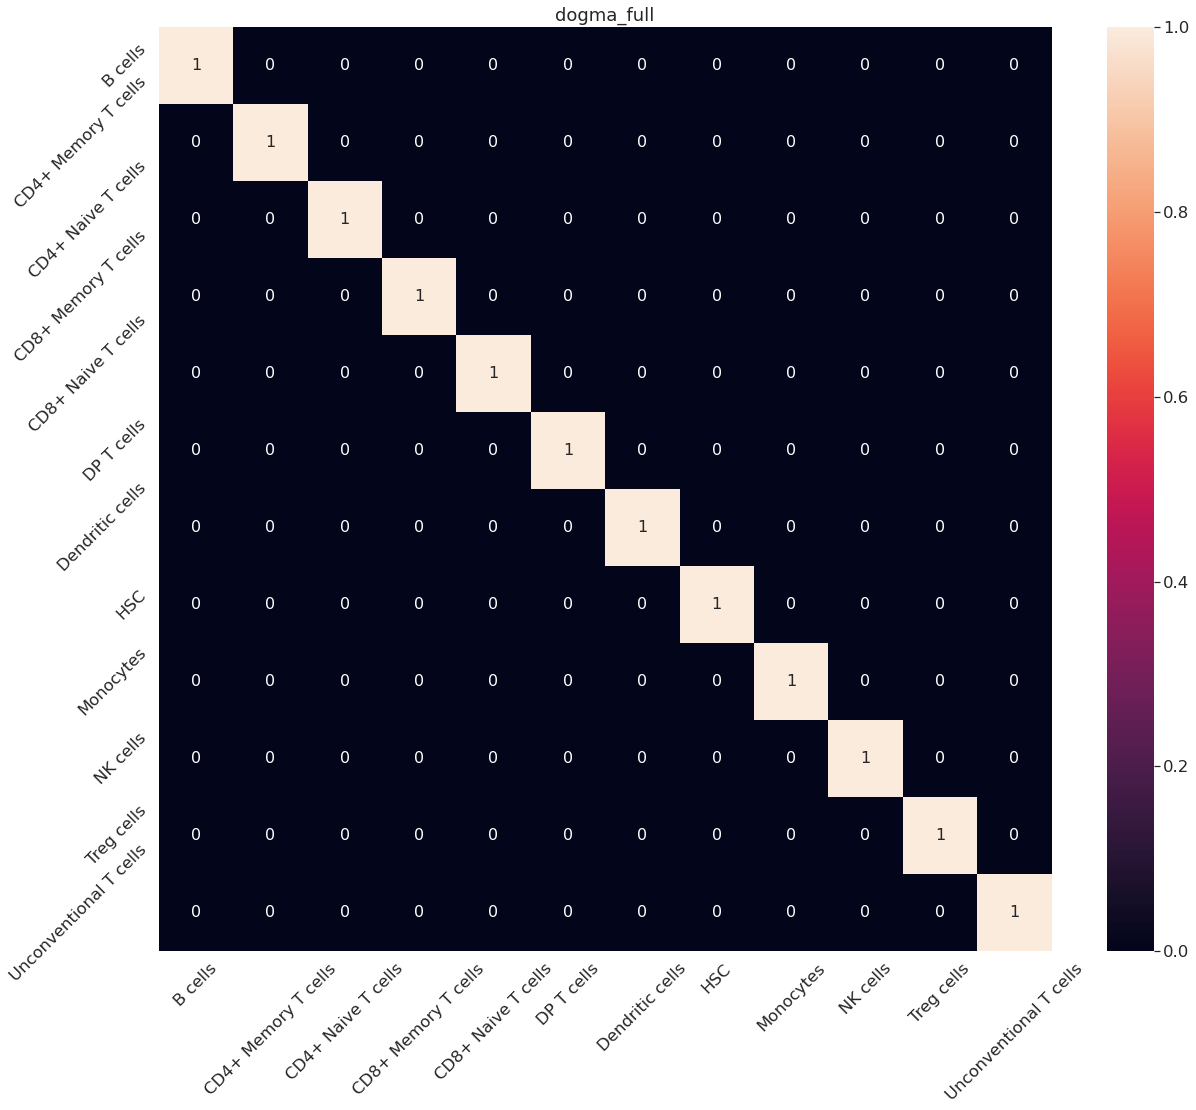

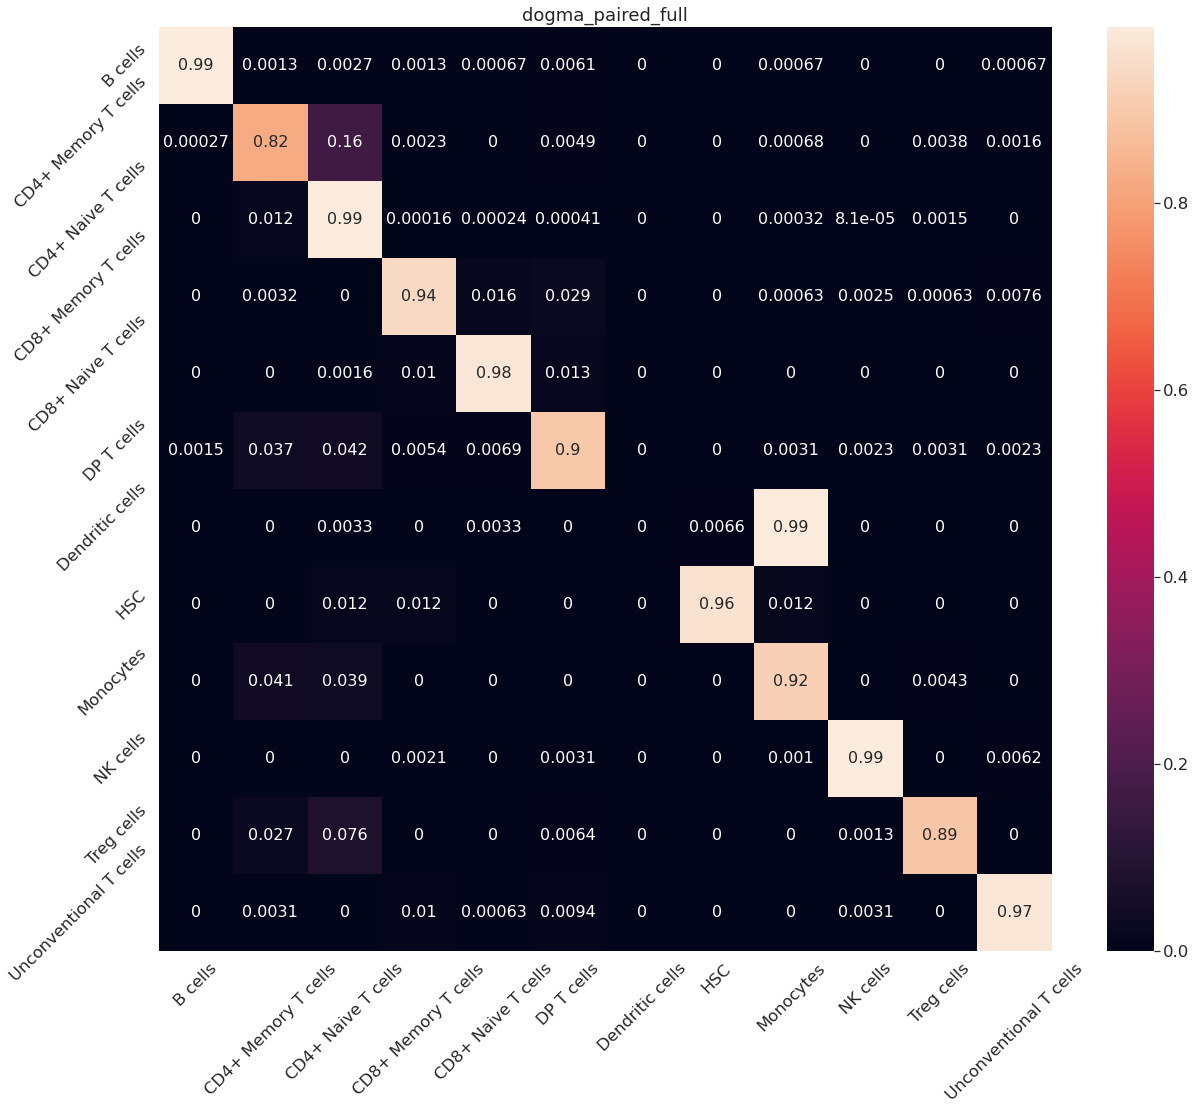

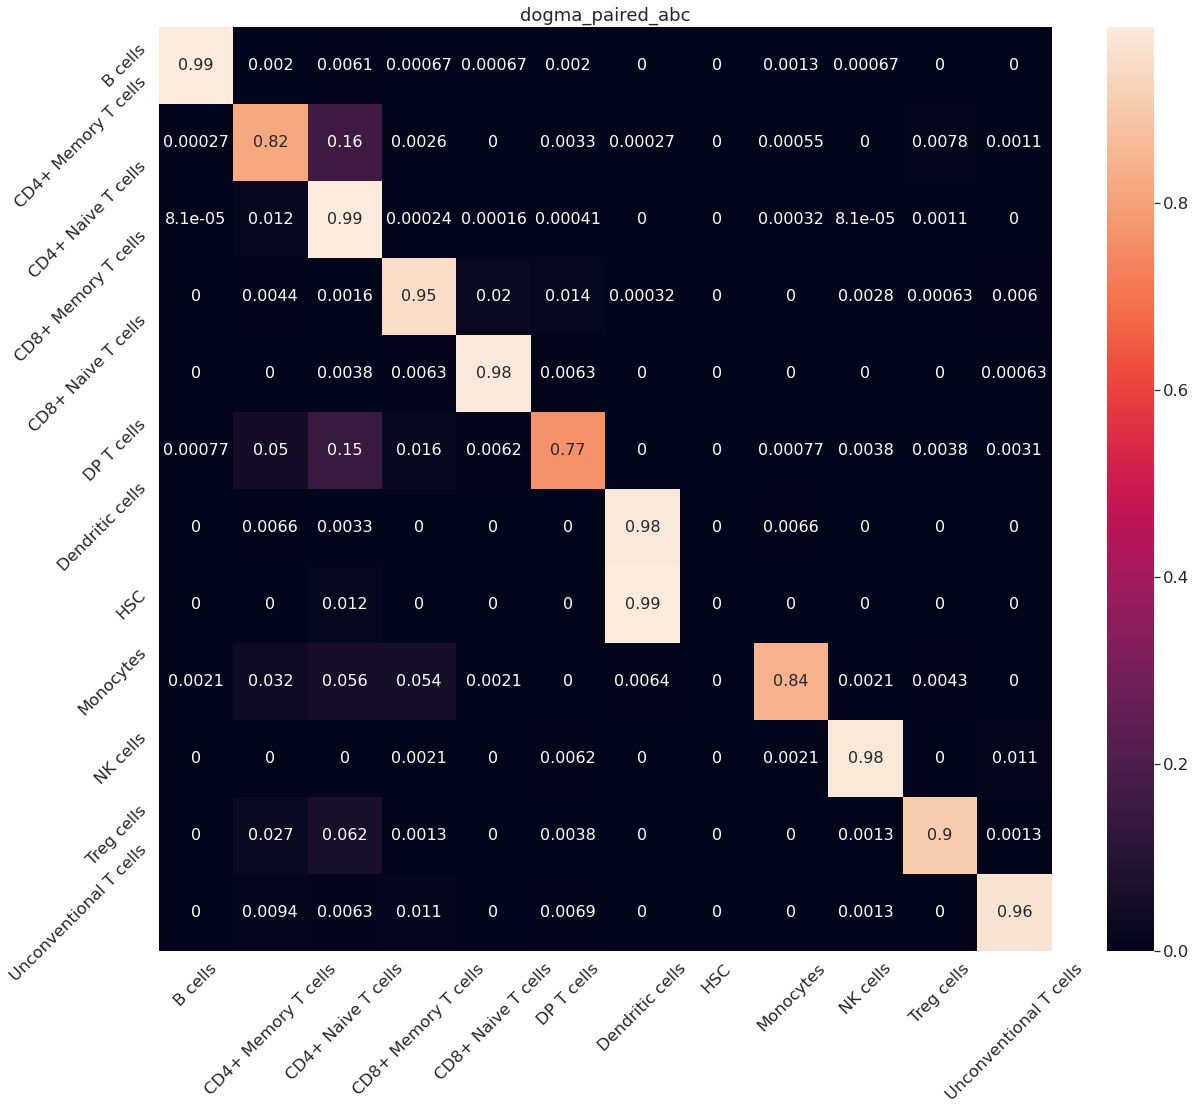

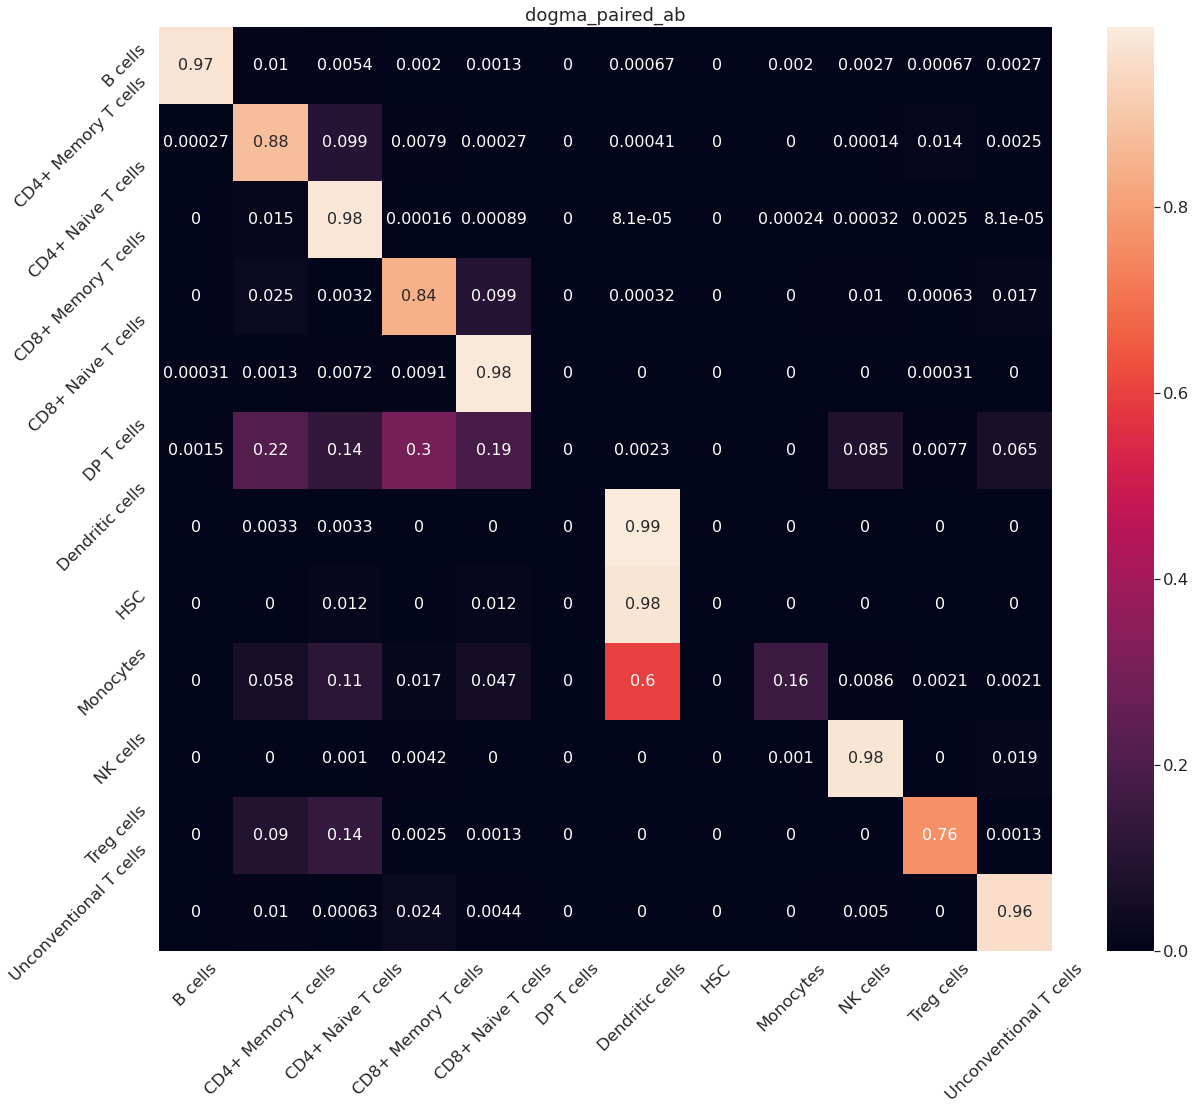

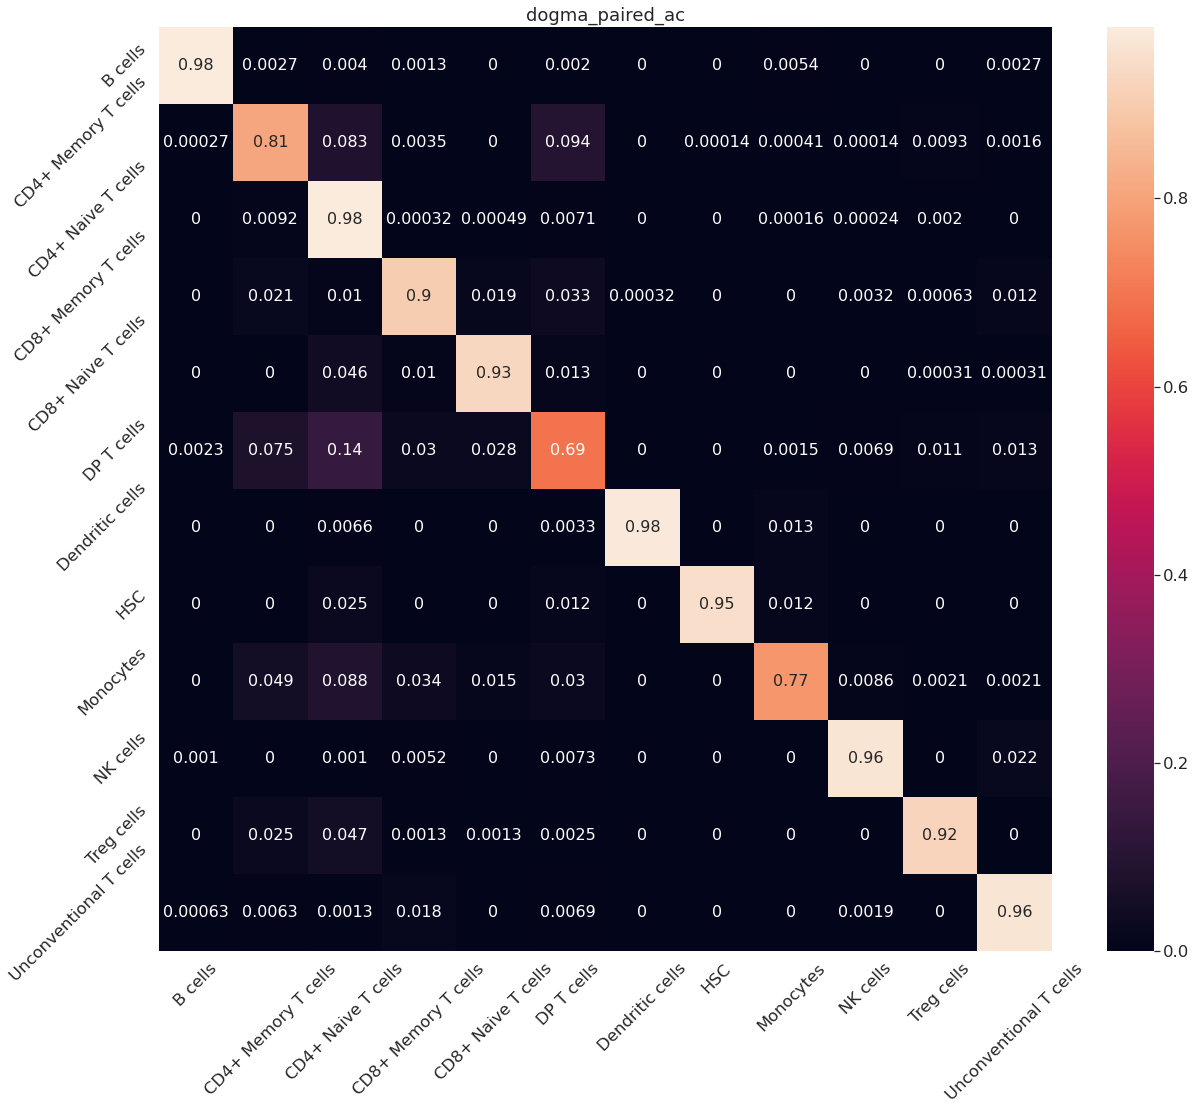

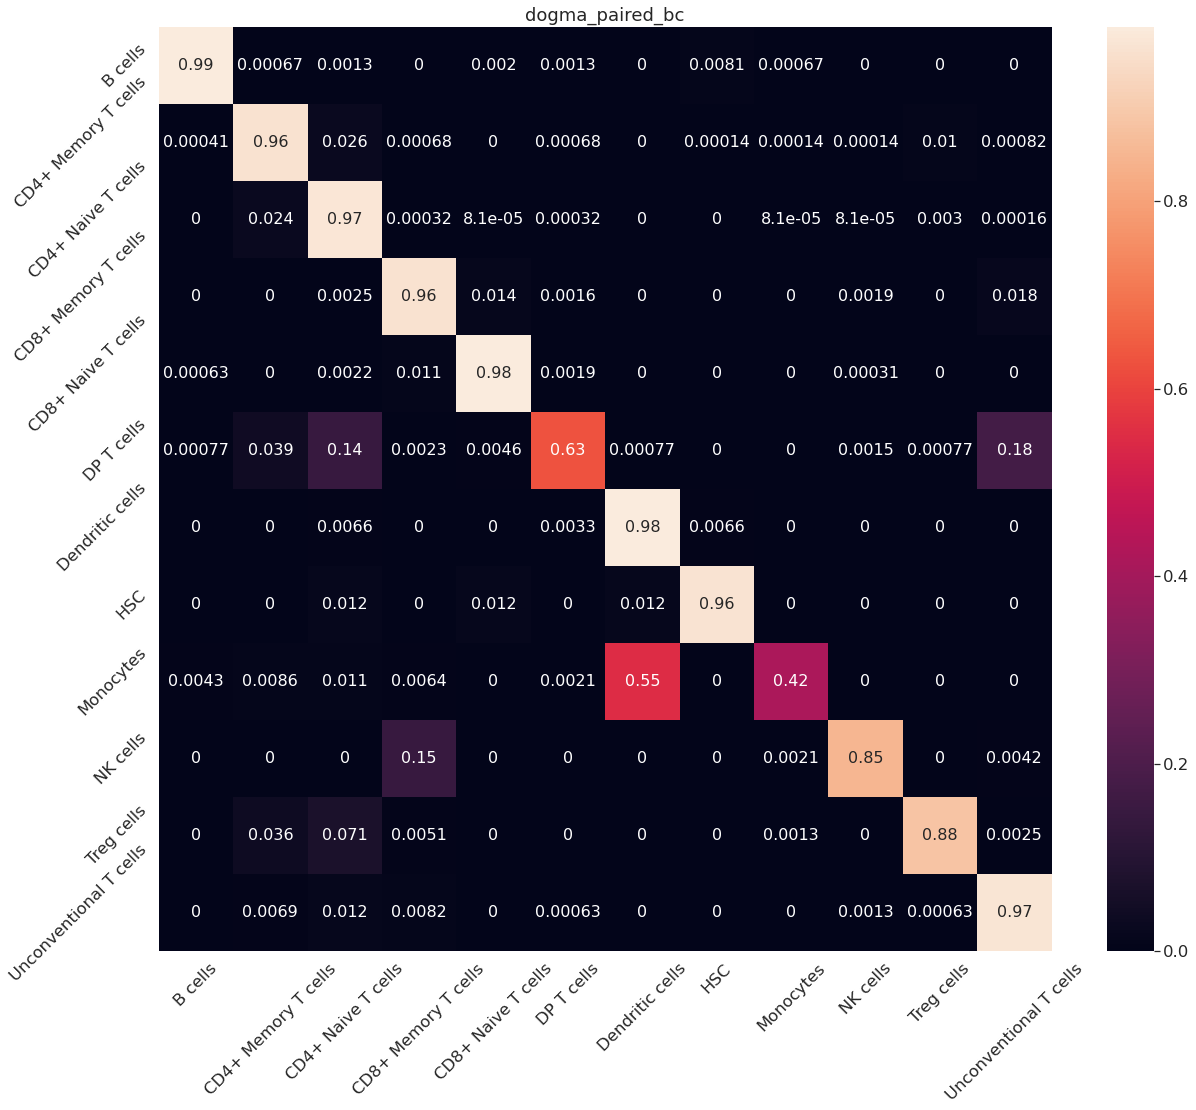

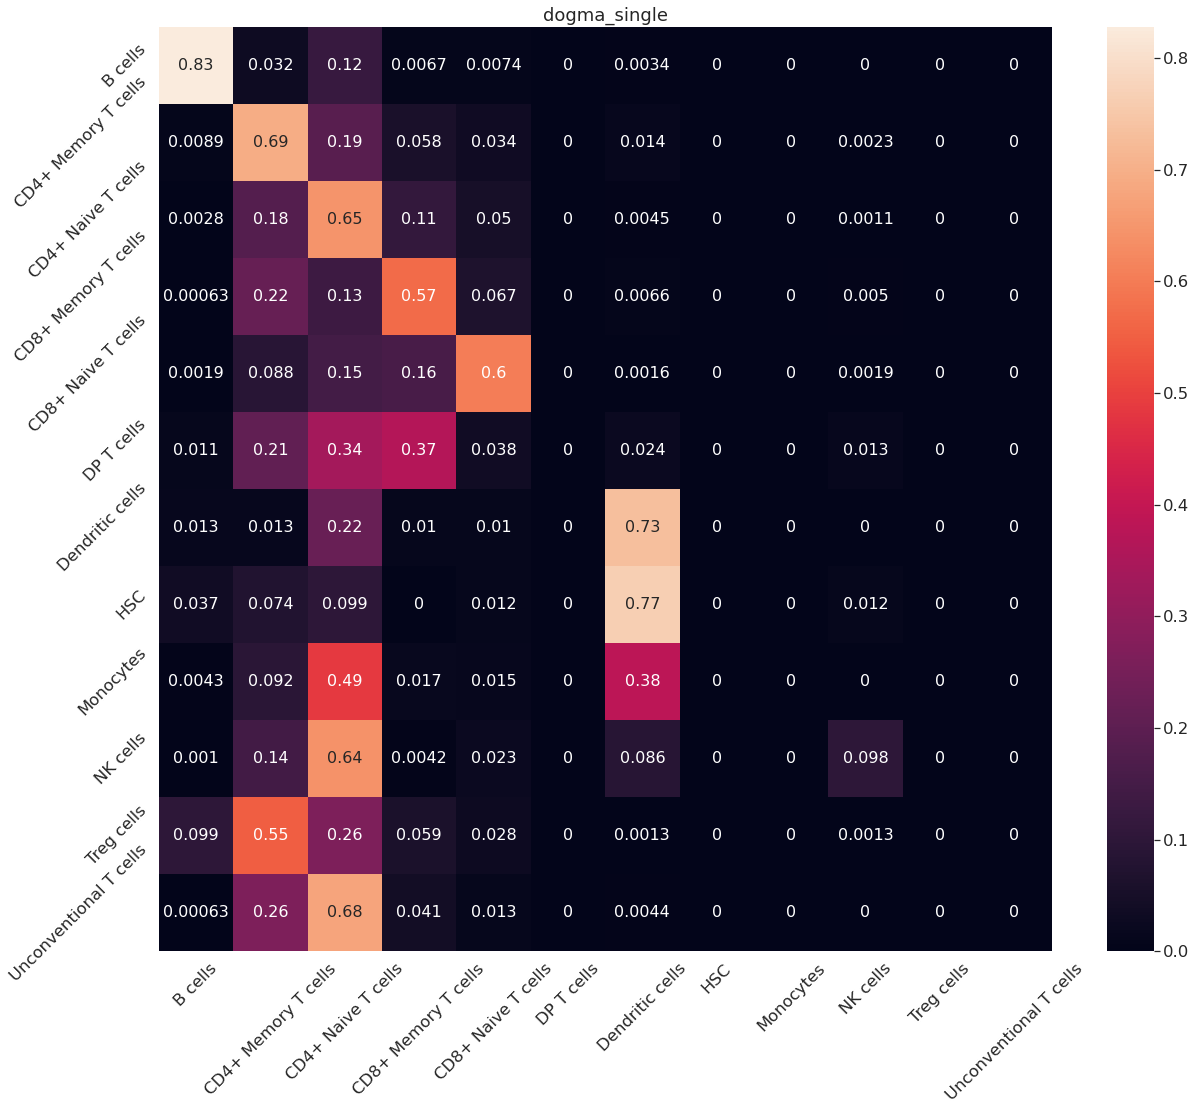

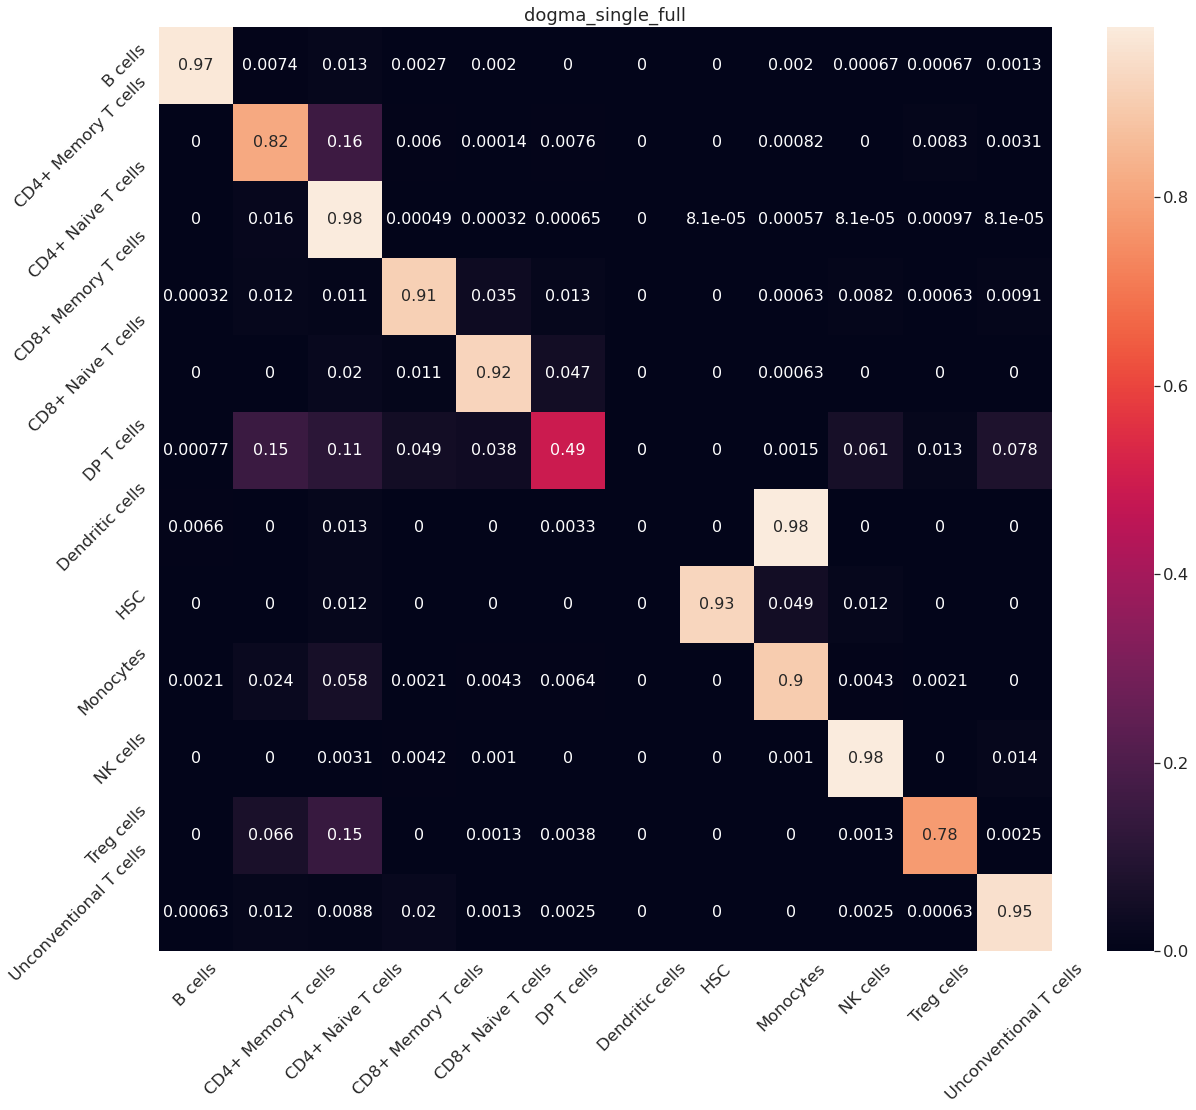

In [6]:

for task in tasks:
    plt.figure(figsize=(20,17))
    sns.set(font_scale=1.5)
    cm = results["confusion"][task].astype('float') / results["confusion"][task].sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(cm, annot=True, annot_kws={"size": 16})
    ax.xaxis.set_ticklabels(label_keys, rotation=45)
    ax.yaxis.set_ticklabels(label_keys, rotation=45)
    plt.title(o.data+"_"+task)
    plt.savefig(pj(fig_dir, "confusion_"+o.data+"_"+task+".png"))